In [90]:
import numpy as np
import matplotlib.pyplot as plt
# number of classes = 1; use binary_crossentropy
# number of classes > 1; use categorical_crossentropy

# Generate Dataset

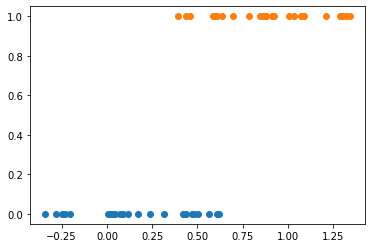

In [91]:
scale = 0.35
dim = 1
set_nr = 2
set_size = 25
for i in range(set_nr):
    center_point = scale * np.full((set_size, dim), -1)
    for flip in range(i):
        center_point.T[flip] = scale
    x_set_points = np.random.random_sample((set_size, dim)) + center_point
    y_set_labels = np.full(set_size, i)
    #if dim >= 3:
    #    plt.scatter3D(x_set_points.T[0], x_set_points.T[1], x_set_points.T[2])
    #else:
    if dim == 1:
        plt.scatter(x_set_points, y_set_labels)
    else:
        plt.scatter(x_set_points.T[0], x_set_points.T[1])
    if i > 0:
        x_points = np.concatenate((x_points, x_set_points), axis=0)
        y_labels = np.concatenate((y_labels, y_set_labels), axis=0)
    else:
        x_points = x_set_points
        y_labels = y_set_labels
plt.show()

# Logistic Regression (SKLearn)

In [92]:
# every datapoint has a certain number of inputs (x) and a certain number of labels (y).
# given the inputs, we want to guess the labels y. 
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_points, y_labels) #train model on data

LogisticRegression()

In [93]:
y_predict = logisticRegr.predict(x_points)
y_predict

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1])

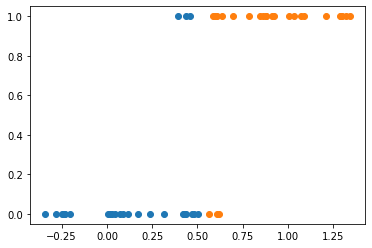

In [94]:
for i in range(set_nr):
    plot_x = x_points[y_predict==i]
    if dim == 1:
        plot_y = y_labels[y_predict==i]
        plt.scatter(plot_x, plot_y)
    if dim > 1:
        plt.scatter(plot_x.T[0], plot_x.T[1])

# Fit Neural Network

In [95]:
# y_labels should have a dimension equal to the number of classes,
# and contain the probability of belonging to each class
label_size = y_labels.shape[0]
class_labels = []
for i in range(set_nr):
    label_array = np.zeros(label_size)
    label_array[y_labels==i] = 1
    class_labels.append(label_array)
    
y_labels_matrix = np.asarray(class_labels).T

In [103]:
# next we create a neural net in Keras that is going to perform logistic regression, 
# and should find the probability for each point to fit in a certain label
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model = Sequential()
#model.add(Flatten)
model.add(Dense(1, #output dim = set_nr
                activation = 'sigmoid', 
                input_shape=(1,), use_bias=True)) #, input_dim = dim)) #first parameter is dimension
model.compile(optimizer='adam', loss='categorical_crossentropy')

In [104]:
model.fit(
    x_points, 
    y_labels_matrix, 
    batch_size=1, # how many examples do we train in tandem?
    epochs=5, # how may times do we go through the entire dataset
    verbose=2, # set to '2' to print progress bar
    callbacks=None, 
    validation_split=0.2, 
    validation_data=None, 
    shuffle=True, #shuffle the data
    class_weight=None, 
    sample_weight=None,
    initial_epoch=1)

Epoch 2/5
40/40 - 1s - loss: 0.7608 - val_loss: 0.9362 - 651ms/epoch - 16ms/step
Epoch 3/5
40/40 - 0s - loss: 0.7363 - val_loss: 0.9022 - 77ms/epoch - 2ms/step
Epoch 4/5
40/40 - 0s - loss: 0.7137 - val_loss: 0.8672 - 89ms/epoch - 2ms/step
Epoch 5/5
40/40 - 0s - loss: 0.6923 - val_loss: 0.8304 - 94ms/epoch - 2ms/step


In [105]:
model_predictions = model.predict(
    x_points, 
    batch_size=1, 
    verbose=1)

50/50 [==============================] - 0s 1ms/step


In [106]:
#model_predictions
# output now gives probabilities to below to a certain set?

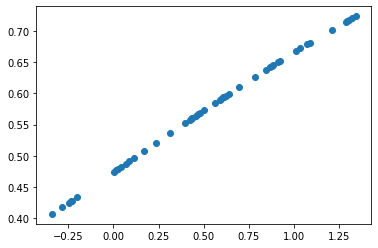

In [107]:
plt.scatter(x_points, model_predictions.T[1])

# 

# Example from Internet

In [78]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1L2

#Set up the logistic regression model

model = Sequential()
model.add(Dense(2,  # output dim is 2, one score per each class
                activation='softmax',
                kernel_regularizer=L1L2(l1=0.0, l2=0.1),
                input_dim=len(feature_vector))  # input dimension = number of features your data has
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val))

SyntaxError: invalid syntax (Temp/ipykernel_29568/891594936.py, line 13)